### **Capstone Project: Food Vision**

In [1]:
# DL needs
import tensorflow as tf
import keras as kr


# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

# file handling
import argparse
import os
path = os.getcwd()

2025-04-14 13:49:33.451690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**12. Creating an end to end pipeline to input a food image and get its name**

'ice_cream'

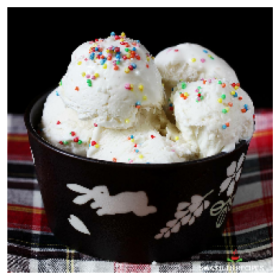

In [5]:
class FoodVision:
    def __init__(self,model_filepath = 'models/fine_tuned_model.keras',labels_filepath = 'labels.txt' ):
        self.model = tf.keras.models.load_model(model_filepath)
        
        # getting labels
        with open(labels_filepath) as file:
            self.food_names = file.read().split('\n')
        pass


    def pre_process(self,img_path):
        # read image file
        img = tf.io.read_file(img_path)
        img = tf.io.decode_image(img)

        # pre-process
        img = tf.image.resize(img,(224,224))
        img = tf.expand_dims(img,axis=0)
        return img
        
    def get_food_name(self,img_filepath):
        img = self.pre_process(img_filepath)
        pred = self.model.predict(img,verbose = 0)
        pred_label = tf.squeeze(tf.argmax(pred,axis = 1))
        pred_class = self.food_names[pred_label]
        return pred_class

fv = FoodVision()
plt.imshow(tf.squeeze(fv.pre_process('custom_images/icecream.jpeg'))/255.0)
plt.axis('off')
fv.get_food_name('custom_images/icecream.jpeg')